# Computing with Notebooks

Start by giving your notebook a good name - `untitled1.ipynb` is not a good name. Also, include a general summary, such as this one, at the top of the notebook to remind yourself (and anyone else using the notebook) of the purpose and scope of the notebook. You might also include things such as the sources of data used in the notebook and even a simple *change-log* listing dates with major modifications to the notebook.

In this notebook we'll review some suggested practices for good notebook computing. In general, this is aimed at the scenario in which we'll start out using notebooks for in this class:

* the notebook is primarily authored by one person and is primarily used by that same person,
* the notebook contains exploratory analysis and model development,
* the notebooks isn't intended to be put into a production analysis pipeline.

Later, we'll discuss more advanced practices to support collaborative development, notebook sharing and productionizing notebooks. 

A few good resources on good notebook practices include:

* [Building a Repeatable Data Analysis Process with Jupyter Notebooks](https://pbpython.com/notebook-process.html) - popular blog post from Practical Business Python (referred to as the *PBP* post throughout this document)

## Preliminaries

Put your imports at the top. Convention is to list them in order:

* built in Python libraries
* 3rd party libraries
* your libraries

In [2]:
# Python standard libraries are first
import copy

# Third party libraries come next
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Finally, any user defined libraries (we'll be learning about this library later in the course)
import whatif


If you are going to be plotting, use this magic command to allow enable inline plotting

In [3]:
%matplotlib inline

Here's the [Jupyter magic command doc page](https://ipython.readthedocs.io/en/stable/interactive/magics.html) and a [cheat sheet](https://www.john-cd.com/cheatsheets/Python/Jupyter/). You can list them all like this (but it's just a list):

**ADVANCED** If you are going to be using a notebook with one of your own libraries that you are still debugging and editing, the following magic commands will auto-reload modules in a Jupyter notebook so that changes in `.py` files doesn't require manual reloading. See https://stackoverflow.com/questions/5364050/reloading-submodules-in-ipython.

In [4]:
%load_ext autoreload
%autoreload 2

## Intro to Notebooks
The beauty of Jupyter notebooks is the ability to mix explanatory text (*markdown cells*) with executable code (*code cells*). This is something known as [literate programming](https://en.wikipedia.org/wiki/Literate_programming), a paradigm introduced by one of the giants of computing, [Donald Knuth](https://en.wikipedia.org/wiki/Donald_Knuth). Knuth authored the famous multi-volume set of books entitled [The Art of Computer Programming](https://www-cs-faculty.stanford.edu/~knuth/taocp.html) and developed the popular typesetting program [TeX](https://www.tug.org/begin.html). A set of macros built on top of TeX is known as [LaTeX](https://www.latex-project.org/) (pronounced la-tech) and is what thousands of technical and mathematical papers are written in. In fact, we'll use LaTeX within Jupyter notebooks to display math such as:

$$
P = \alpha\sum_{n=1}^N \theta_n^2
$$

When you are writing explanatory text, do it in markdown cells and NOT as giant comments in a code cell. To switch between the two types of cells you can either use the drop down at the far right of the toolbar or switch into *Command Mode* for the cell by hitting the ESC key and then 'm' for Markdown or 'y' for code.

### Changes in Jupyter Lab 3 interface and keyboard shortcuts
Some things have changed in the latest Jupyter Lab interface such as what's included in the left sidebar (TOC in, commands tab out). You can also toggle the Simple Interface through the View Menu (try it to see what it does). To find the keyboard shortcut for various commands, use View | Activate Command Palette or CTRL+SHIFT+c and then search for a command.

There are a ton of keyboard shortcuts. A few really useful ones are:

* Insert cell above - In Command Mode, press 'a'
* Insert cell below - In Command Mode, press 'b'
* Change cell to Markdown - In Command Mode, press 'm'
* Evaluate current cell and go to cell below (or insert new cell below if none) - Shift-Enter
* Evaluate current cell and keep current cell active - Ctrl-Enter
* Evaluate current cell and insert new cell below, Alt-Enter

Here's a [Jupyter keyboard shortcut cheat sheet](https://blog.ja-ke.tech/assets/jupyterlab-shortcuts/Shortcuts.png).

### Jupyter Notebook vs Jupyter Lab

Jupyter Lab is the latest interface incarnation of Jupyter Notebooks. In my pcda class, I did a screencast on comparing the two interfaces. You can use either or both.

* here’s a nice [overview post about this evolution](https://towardsdatascience.com/jupyter-lab-evolution-of-the-jupyter-notebook-5297cacde6b)
* it is important to note that the underlying Jupyter notebooks themselves have not changed. What has changed is the interface for working with them.
* [SCREENCAST: The relationship between JupyterLab and Jupyter Notebook](https://youtu.be/qmkWL6jRwpI)

### Jupyter notebook basics
If you are in this class, I'm assuming you are already familiar with the basics of using Jupyter notebooks. There are tons of tutorials out there and Chapter 1 of the PDSH text is all about using the IPython shell and Juptyer notebooks. Many of the [tutorials available on the web](https://realpython.com/jupyter-notebook-introduction/) are based on the classic Notebook interface but most of the main concepts and techniques carry over to the new Lab interface. There's a short [presentation from PyData 2018](https://www.youtube.com/watch?v=NSiPeoDpwuI) that describes the evolution of the Notebook to the Lab interface and gives an overview of the Lab interface (an early version), if you're interested. The Lab interface is super intuitive and you'll pick it up quickly.

## Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks

This is the title of an [short article that appeared in PLOS Computational Biology](Ten simple rules for writing and sharing computational analyses in Jupyter Notebooks) and contains much wisdom. Note that one of the authors is [Fernando Perez, the creator of the IPython Notebook](http://blog.fperez.org/2012/01/ipython-notebook-historical.html). Some of these rules are about more things we'll get to later in the course, buy many are immediately applicable.  Here are the ten rules along with a short comment or two. **READ THE ARTICLE**.

* **Rule 1 - Tell a story for an audience**
    - stories are powerful
    - you write more completely and clearly when you know you have an audience
* **Rule 2 - Document the process, not just the results**
    - add explanatory text and code comments as you go
* **Rule 3 - Use cell divisions to make steps clear**
    - avoid giant code cells
    - easier to explain and understand shorter code cells
* **Rule 4 - Modularize code**
    - divide and conquer
    - easier to debug, reuse and maintain
* **Rule 5 - Record dependencies**
    - we'll use conda (and some pip) for dependency management. More on this topic later in the course.
    - good to make it easy for others to use your notebook and this includes any library dependencies
* **Rule 6 - Use version control**
    - seriously, use version control
    - this can be a bit challenging with notebooks with respect to multiple devs and code diffs
    - specialized tools such as `nbdime` are popping up to address this issue. More on this later in the course.
* **Rule 7 - Build a pipeline**
    - think about reuse and reusability from the start. How can my notebook be a nice player in a longer analytical pipeline of steps?
    - Restart kernel and run all (more on this later)
    - tools exist for parameterization notebooks to make them more generalizable (e.g. [papermill](https://papermill.readthedocs.io/en/latest/), more on this later in the course).
* **Rule 8 - Share and explain your data**
    - while this can sometimes be challenging, try to make it easy for others to use your notebook and that means access to data
* **Rule 9 - Design your notebooks to be read, run, and explored**
    - this touches on notebook structure, sharing, permissions and licensing, static versions, tools like `nbviewer` and `binder`
    - we'll be revisiting this topic throughout the course
* **Rule 10 - Advocate for open research**
    - be an engaged part of the community

## Example - Using Jupyter to develop a tutorial for a blog post

Later in the course we are going to explore the use of Python for things we might normally do in Excel. The material for that section is based partly on a series of blog posts I did in February of 2021. I'm going to use one of those posts to illustrate some of the concepts listed above.

The notebooks is named `what_if_3_simulation.ipynb`.  Take a look through it. Also, here's a [short screencast that hits a few of the relevant notebook design points](TODO). We'll be digging into this in more detail later in the course.

Here's an example of using markdown to include an image in a notebook:

![excel_screenshot](images/tech_sales_model.png)

Unfortunately, when done this way, the images won't show up if you export the notebook to html. The approach below gets around this issue.

In [1]:
from IPython.display import Image

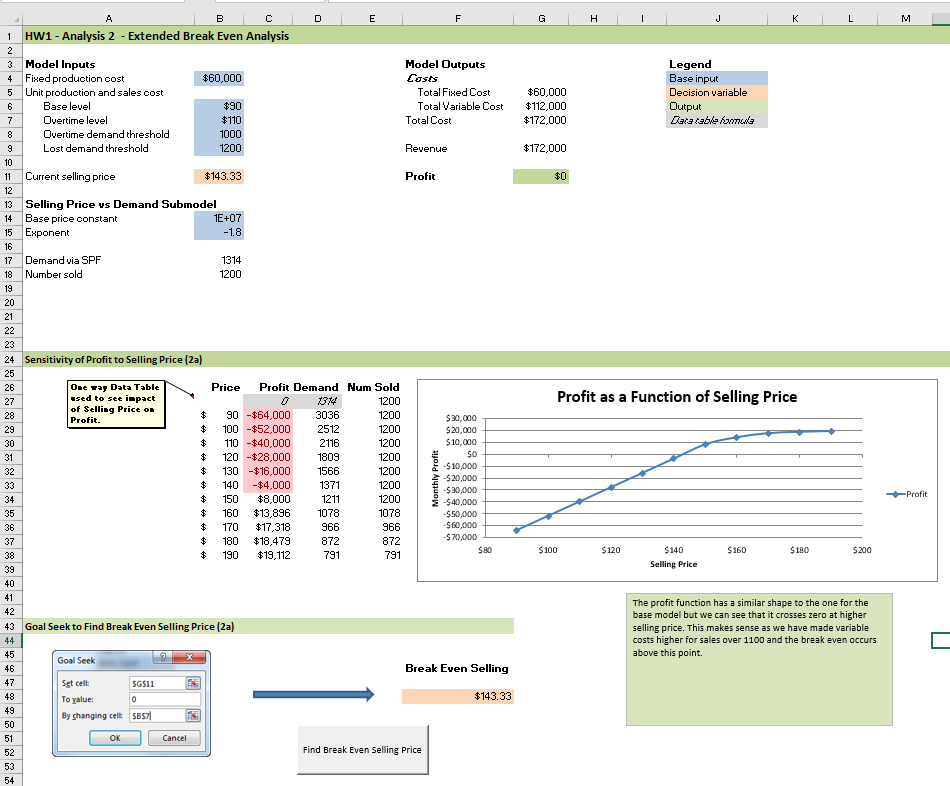

In [2]:
Image('images/tech_sales_model.png')